# GeoPandas

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/giswqs/geog-312/blob/main/book/geospatial/geopandas.ipynb)

## Overview

[GeoPandas](https://geopandas.org) is an open-source Python library that simplifies working with geospatial data by extending Pandas data structures. It seamlessly integrates geospatial operations with a pandas-like interface, allowing for the manipulation of geometric types such as points, lines, and polygons. GeoPandas combines the functionalities of Pandas and Shapely, enabling geospatial operations like spatial joins, buffering, intersections, and projections with ease.

## Learning Objectives

By the end of this lecture, you should be able to:

- Understand the basic data structures in GeoPandas: `GeoDataFrame` and `GeoSeries`.
- Create `GeoDataFrames` from tabular data and geometric shapes.
- Read and write geospatial data formats like Shapefile and GeoJSON.
- Perform common geospatial operations such as measuring areas, distances, and spatial relationships.
- Visualize geospatial data using Matplotlib and GeoPandas' built-in plotting functions.
- Work with different Coordinate Reference Systems (CRS) and project geospatial data.

## Concepts

The core data structures in GeoPandas are `GeoDataFrame` and `GeoSeries`. A `GeoDataFrame` extends the functionality of a Pandas DataFrame by adding a geometry column, allowing spatial data operations on geometric shapes. The `GeoSeries` handles geometric data (points, polygons, etc.).

A `GeoDataFrame` can have multiple geometry columns, but only one is considered the active geometry at any time. All spatial operations are applied to this active geometry, accessible via the `.geometry` attribute.

## Installing and Importing GeoPandas

Before we begin, make sure you have geopandas installed. You can install it using:

In [1]:
# %pip install geopandas

Once installed, import GeoPandas and other necessary libraries:

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## Creating GeoDataFrames

A GeoDataFrame is a tabular data structure that contains a `geometry` column, which holds the geometric shapes. You can create a GeoDataFrame from a list of geometries or from a pandas DataFrame.

In [3]:
# Creating a GeoDataFrame from scratch
data = {
    "City": ["Tokyo", "New York", "London", "Paris"],
    "Latitude": [35.6895, 40.7128, 51.5074, 48.8566],
    "Longitude": [139.6917, -74.0060, -0.1278, 2.3522],
}

df = pd.DataFrame(data)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
gdf

,City,Latitude,Longitude,geometry
0,Tokyo,35.6895,139.6917,POINT (139.6917 35.6895)
1,New York,40.7128,-74.0060,POINT (-74.006 40.7128)
2,London,51.5074,-0.1278,POINT (-0.1278 51.5074)
3,Paris,48.8566,2.3522,POINT (2.3522 48.8566)


## Reading and Writing Geospatial Data

GeoPandas allows reading and writing a variety of geospatial formats, such as Shapefiles, GeoJSON, and more. We'll use a GeoJSON dataset of New York City borough boundaries.

### Reading a GeoJSON File

We'll load the New York boroughs dataset from a GeoJSON file hosted online.

In [4]:
url = "https://github.com/opengeos/datasets/releases/download/vector/nybb.geojson"
gdf = gpd.read_file(url)
gdf.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


This `GeoDataFrame` contains several columns, including `BoroName`, which represents the names of the boroughs, and `geometry`, which stores the polygons for each borough.

### Writing to a GeoJSON File

GeoPandas also supports saving geospatial data back to disk. For example, we can save the GeoDataFrame as a new GeoJSON file:

In [5]:
output_file = "nyc_boroughs.geojson"
gdf.to_file(output_file, driver="GeoJSON")
print(f"GeoDataFrame has been written to {output_file}")

GeoDataFrame has been written to nyc_boroughs.geojson


Similarly, you can write GeoDataFrames to other formats, such as Shapefiles, GeoPackage, and more.

In [6]:
output_file = "nyc_boroughs.shp"
gdf.to_file(output_file)

/opt/anaconda3/envs/gee/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Value 1623819823.80999994 of field Shape_Area of feature 0 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/opt/anaconda3/envs/gee/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Value 3045212795.19999981 of field Shape_Area of feature 1 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/opt/anaconda3/envs/gee/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Value 1937478507.6099999 of field Shape_Area of feature 2 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/opt/anaconda3/envs/gee/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Value 636471539.774000049 of field Shape_Area of feature 3 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/opt/

In [7]:
output_file = "nyc_boroughs.gpkg"
gdf.to_file(output_file, driver="GPKG")

## Simple Accessors and Methods

Now that we have the data, let's explore some simple GeoPandas methods to manipulate and analyze the geometric data.

### Measuring Area

We can calculate the area of each borough. GeoPandas automatically calculates the area of each polygon:

In [8]:
# Set BoroName as the index for easier reference
gdf = gdf.set_index("BoroName")

# Calculate the area
gdf["area"] = gdf.area
gdf

,BoroCode,Shape_Leng,Shape_Area,geometry,area
BoroName,,,,,
Staten Island,5,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227....",1.623822e+09
Queens,4,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957...",3.045214e+09
Brooklyn,3,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100...",1.937478e+09
Manhattan,1,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940....",6.364712e+08
Bronx,2,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278...",1.186926e+09


### Getting Polygon Boundaries and Centroids

To get the boundary (lines) and centroid (center point) of each polygon:

In [9]:
# Get the boundary of each polygon
gdf["boundary"] = gdf.boundary

# Get the centroid of each polygon
gdf["centroid"] = gdf.centroid

gdf[["boundary", "centroid"]]

,boundary,centroid
BoroName,,
Staten Island,"MULTILINESTRING ((970217.022 145643.332, 97022...",POINT (941639.45 150931.991)
Queens,"MULTILINESTRING ((1029606.077 156073.814, 1029...",POINT (1034578.078 197116.604)
Brooklyn,"MULTILINESTRING ((1021176.479 151374.797, 1021...",POINT (998769.115 174169.761)
Manhattan,"MULTILINESTRING ((981219.056 188655.316, 98094...",POINT (993336.965 222451.437)
Bronx,"MULTILINESTRING ((1012821.806 229228.265, 1012...",POINT (1021174.79 249937.98)


### Measuring Distance

We can also measure the distance from each borough's centroid to a reference point, such as the centroid of Manhattan.

In [10]:
# Use Manhattan's centroid as the reference point
manhattan_centroid = gdf.loc["Manhattan", "centroid"]

# Calculate the distance from each centroid to Manhattan's centroid
gdf["distance_to_manhattan"] = gdf["centroid"].distance(manhattan_centroid)
gdf[["centroid", "distance_to_manhattan"]]

,centroid,distance_to_manhattan
BoroName,,
Staten Island,POINT (941639.45 150931.991),88247.742789
Queens,POINT (1034578.078 197116.604),48401.272479
Brooklyn,POINT (998769.115 174169.761),48586.299386
Manhattan,POINT (993336.965 222451.437),0.000000
Bronx,POINT (1021174.79 249937.98),39121.024479


### Calculating Mean Distance

We can calculate the mean distance between the borough centroids and Manhattan:

In [11]:
mean_distance = gdf["distance_to_manhattan"].mean()
print(f"Mean distance to Manhattan: {mean_distance} units")

Mean distance to Manhattan: 44871.26782659276 units


## Plotting Geospatial Data

GeoPandas integrates with Matplotlib for easy plotting of geospatial data. Let's create some maps to visualize the data.

### Plotting the Area of Each Borough

We can color the boroughs based on their area and display a legend:

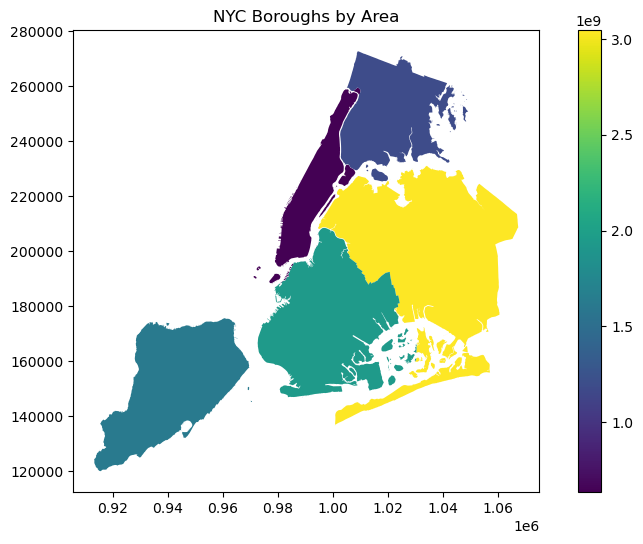

In [12]:
gdf.plot("area", legend=True, figsize=(10, 6))
plt.title("NYC Boroughs by Area")
plt.show()

### Plotting Centroids and Boundaries

We can also plot the centroids and boundaries:

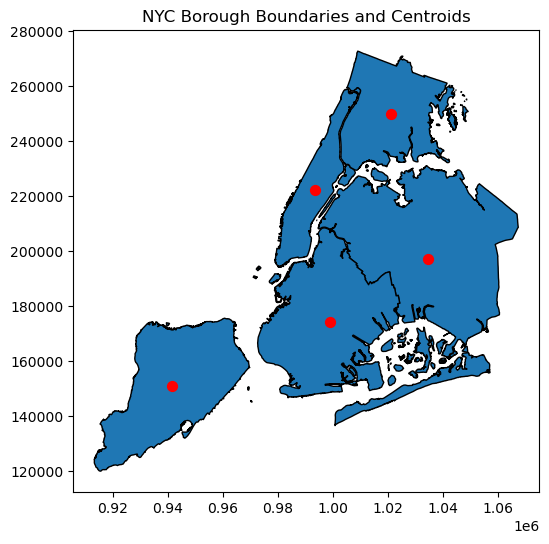

In [13]:
# Plot the boundaries and centroids
ax = gdf["geometry"].plot(figsize=(10, 6), edgecolor="black")
gdf["centroid"].plot(ax=ax, color="red", markersize=50)
plt.title("NYC Borough Boundaries and Centroids")
plt.show()

You can also explore your data interactively using `GeoDataFrame.explore()`, which behaves in the same way `plot()` does but returns an interactive map instead.

In [14]:
gdf.explore("area", legend=False)

## Geometry Manipulations

GeoPandas provides several methods for manipulating geometries, such as buffering (creating a buffer zone around geometries) and computing convex hulls (the smallest convex shape enclosing the geometries).

### Buffering Geometries

We can create a buffer zone around each borough:

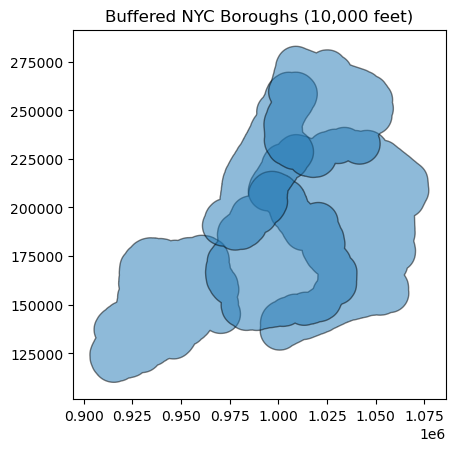

In [15]:
# Buffer the boroughs by 10000 feet
gdf["buffered"] = gdf.buffer(10000)

# Plot the buffered geometries
gdf["buffered"].plot(alpha=0.5, edgecolor="black")
plt.title("Buffered NYC Boroughs (10,000 feet)")
plt.show()

### Convex Hulls

The convex hull is the smallest convex shape that can enclose a geometry. Let's calculate the convex hull for each borough:

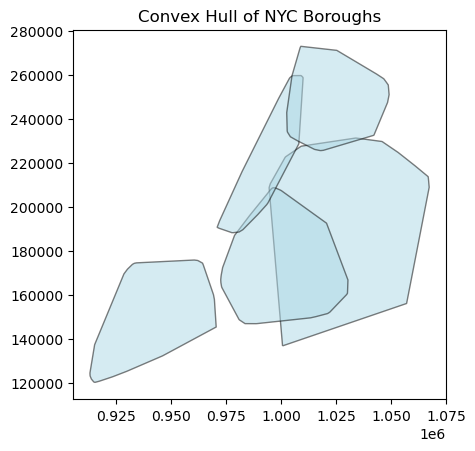

In [16]:
# Calculate convex hull
gdf["convex_hull"] = gdf.convex_hull

# Plot the convex hulls
gdf["convex_hull"].plot(alpha=0.5, color="lightblue", edgecolor="black")
plt.title("Convex Hull of NYC Boroughs")
plt.show()

## Spatial Queries and Relations

We can also perform spatial queries to examine relationships between geometries. For instance, we can check which boroughs are within a certain distance of Manhattan.

### Checking for Intersections

We can find which boroughs' buffered areas intersect with the original geometry of Manhattan:

In [17]:
# Get the geometry of Manhattan
manhattan_geom = gdf.loc["Manhattan", "geometry"]

# Check which buffered boroughs intersect with Manhattan's geometry
gdf["intersects_manhattan"] = gdf["buffered"].intersects(manhattan_geom)
gdf[["intersects_manhattan"]]

,intersects_manhattan
BoroName,
Staten Island,False
Queens,True
Brooklyn,True
Manhattan,True
Bronx,True


### Checking for Containment

Similarly, we can check if the centroids are contained within the borough boundaries:

In [18]:
# Check if centroids are within the original borough geometries
gdf["centroid_within_borough"] = gdf["centroid"].within(gdf["geometry"])
gdf[["centroid_within_borough"]]

,centroid_within_borough
BoroName,
Staten Island,True
Queens,True
Brooklyn,True
Manhattan,True
Bronx,True


## Projections and Coordinate Reference Systems (CRS)

GeoPandas makes it easy to manage projections. Each GeoSeries and GeoDataFrame has a crs attribute that defines its CRS.

### Checking the CRS

Let's check the CRS of the boroughs dataset:

In [19]:
print(gdf.crs)

EPSG:2263


The CRS for this dataset is [`EPSG:2263`](https://epsg.io/2263) (NAD83 / New York State Plane). We can reproject the geometries to WGS84 ([`EPSG:4326`](https://epsg.io/4326)), which uses latitude and longitude coordinates.

[EPSG](https://epsg.io) stands for European Petroleum Survey Group, which was a scientific organization that standardized geodetic and coordinate reference systems. EPSG codes are unique identifiers that represent coordinate systems and other geodetic properties. 

### Reprojecting to WGS84

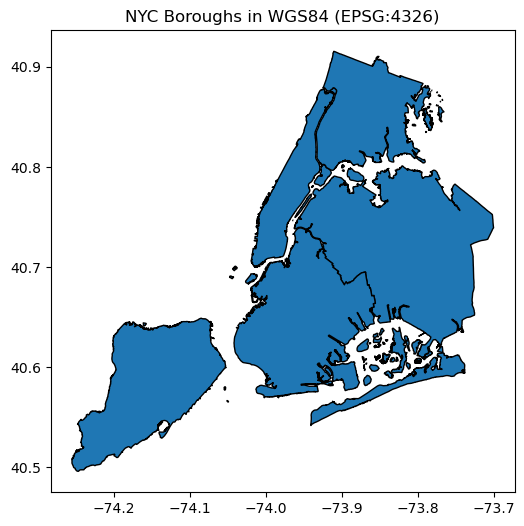

In [20]:
# Reproject the GeoDataFrame to WGS84 (EPSG:4326)
gdf_4326 = gdf.to_crs(epsg=4326)

# Plot the reprojected geometries
gdf_4326.plot(figsize=(10, 6), edgecolor="black")
plt.title("NYC Boroughs in WGS84 (EPSG:4326)")
plt.show()

Notice how the coordinates have changed from feet to degrees.

## Exercises

1. Create a GeoDataFrame containing a list of countries and their capital cities. Add a geometry column with the locations of the capitals.
2. Load a shapefile of your choice, filter the data to only include a specific region or country, and save the filtered GeoDataFrame to a new file.
3. Perform a spatial join between two GeoDataFrames: one containing polygons (e.g., country borders) and one containing points (e.g., cities). Find out which points fall within which polygons.
4. Plot a map showing the distribution of a particular attribute (e.g., population) across different regions.

## Summary

This lecture provided an introduction to working with geospatial data using GeoPandas. We covered basic concepts such as reading/writing geospatial data, performing spatial operations (e.g., buffering, intersections), and visualizing geospatial data using maps. GeoPandas, built on Pandas and Shapely, enables efficient and intuitive geospatial analysis in Python.